# Stamp detection 

# Load Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from matplotlib.pyplot import imshow

# Load images from folder

In [2]:
path = "/home/pyimagesearch/Desktop/stamp/Test_documents/"

In [3]:
image_name = "1.png" 

In [4]:
img_path = path +  image_name   

In [5]:
destination = "/home/pyimagesearch/Desktop/stamp/temp/"+ str(image_name.split('.')[0]) +"/"
if not os.path.exists(destination):
    os.makedirs(destination)

destination_prob_stamps = "/home/pyimagesearch/Desktop/stamp/temp/"+ str(image_name.split('.')[0]) +"/prob_stamps/"
if not os.path.exists(destination_prob_stamps):
    os.makedirs(destination_prob_stamps) 

# 1. original image

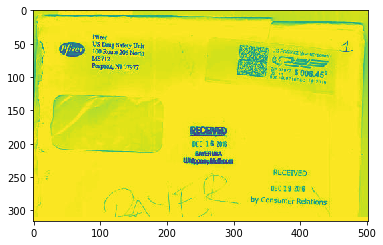

In [6]:
img = cv2.imread(img_path, 0)
plt.imshow(img)

# 2. thresholded image

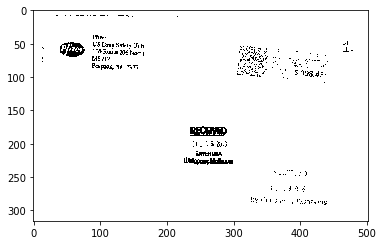

In [7]:
ret, thresh = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
plt.imshow(thresh,cmap='gray')

In [8]:
cv2.imwrite( destination +"thresh.jpg", thresh )

True

# 3. connected component labeling and filtering based on size

In [9]:
size_threshold = (img.shape[0]*img.shape[1])

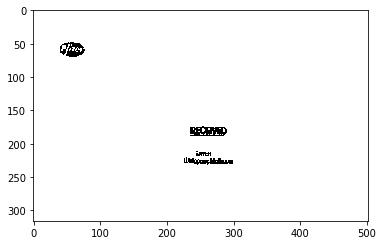

In [10]:
#find all your connected components (white blobs in your image)
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(cv2.bitwise_not(thresh), connectivity=8)
sizes = stats[1:, -1]; nb_components = nb_components - 1

# minimum & maximum size of particles we want to keep (number of pixels)

min_size = 100 
max_size = size_threshold*0.9

img2 = np.zeros((output.shape))
#for every component in the image, you keep it only if it's above min_size & less than max_size
for i in range(0, nb_components):
    if sizes[i] >= min_size and sizes[i] <= max_size:
        img2[output == i + 1] = 255
        
plt.imshow(cv2.bitwise_not(img2),cmap='gray')
plt.show()

In [11]:
cv2.imwrite( destination+ "connected_components.jpg", (img2) )

True

# 4. blurring the image to combine nearby blobs

In [12]:
filter_size = 11 # 21

In [13]:
bb_image = cv2.GaussianBlur(img2,(filter_size,filter_size),0)

In [14]:
# find contours and get the external one
image, contours, hier = cv2.findContours(bb_image.astype('uint8'), cv2.RETR_TREE,
cv2.CHAIN_APPROX_SIMPLE)

In [15]:
img.shape

(316, 502)

# 5. drawing bounding boxes around probable blobs of stamp

In [16]:

# h & w ... based on actual image ratio

stamp_list = []
for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    #print(x , " ", y , " ", w , " ",h)
    if (h>img.shape[0]*.1 and h<img.shape[0]*0.8) and (w>img.shape[1]*0.1 and w<img.shape[1]*0.8):# and (w*h)>300:  # 
        #print(x , " ", y , " ", w , " ",h)
        # draw a rectangle to visualize 
        cv2.rectangle(bb_image, (x, y), (x+w, y+h),(255, 255, 0), 2)
        stamp_list.append([y,y+h,x,x+w])

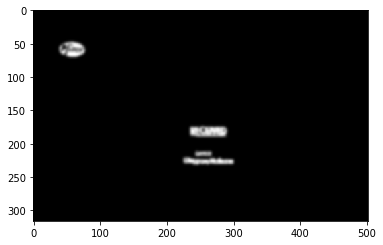

In [17]:
plt.imshow(bb_image,cmap='gray')

In [18]:
cv2.imwrite( destination+ "blur.jpg", (bb_image) )

True

 # 6. Color filter : filter probable stamps based on color 

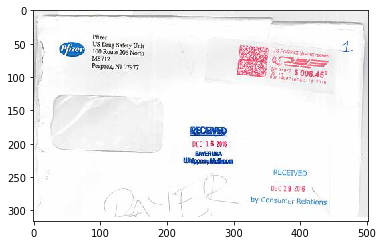

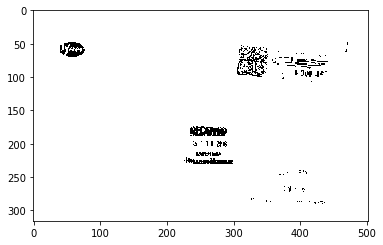

True

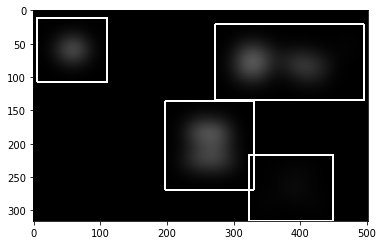

In [19]:
img = cv2.imread(img_path)
# define the list of boundaries
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
lower_color_spectrum = np.array([0, 100, 100])
upper_color_spectrum = np.array([360, 255, 255])
    
mask = cv2.inRange(hsv, lower_color_spectrum, upper_color_spectrum)
res = cv2.bitwise_and(img,img, mask= mask)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

cv2.imwrite( destination+ "color_mask.jpg", (res) )


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_c = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
size_threshold = (img.shape[0]*img.shape[1])

#find all your connected components (white blobs in your image)
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats((mask), connectivity=8)
sizes = stats[1:, -1]; nb_components = nb_components - 1

# minimum & maximum size of particles we want to keep (number of pixels)

min_size = 1 
max_size = size_threshold*0.8

img2 = np.zeros((output.shape))
#for every component in the image, you keep it only if it's above min_size & less than max_size
for i in range(0, nb_components):
    if sizes[i] >= min_size and sizes[i] <= max_size:
        img2[output == i + 1] = 255
        
plt.imshow(cv2.bitwise_not(img2),cmap='gray')
plt.show()

filter_size = 101
bb_image = cv2.GaussianBlur(img2,(filter_size,filter_size),0)

# find contours and get the external one
image, contours, hier = cv2.findContours(bb_image.astype('uint8'), cv2.RETR_TREE,
cv2.CHAIN_APPROX_SIMPLE)

# h & w ... based on actual image ratio

#stamp_list = []
for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    #print(x , " ", y , " ", w , " ",h)
    if (h>img.shape[0]*.05 and h<img.shape[0]*0.9) and (w>img.shape[1]*0.05 and w<img.shape[1]*0.9):# and (w*h)>300:  # 
        #print(x , " ", y , " ", w , " ",h)
        # draw a rectangle to visualize 
        cv2.rectangle(bb_image, (x, y), (x+w, y+h),(255, 255, 0), 2)
        stamp_list.append([y,y+h,x,x+w])
plt.imshow(bb_image,cmap='gray')

cv2.imwrite( destination+ "color_bb.jpg", (bb_image) )

#for i in range (0,len(signature_list)):
#    plt.figure()
#    plt.imshow(img[signature_list[i][0]:signature_list[i][1] ,signature_list[i][2]:signature_list[i][3]],cmap='hsv')


# 7. Plot all probable stamp identified

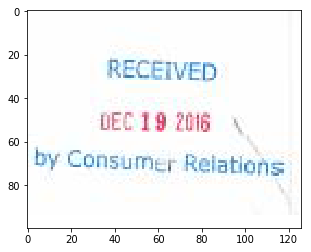

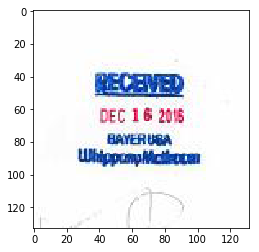

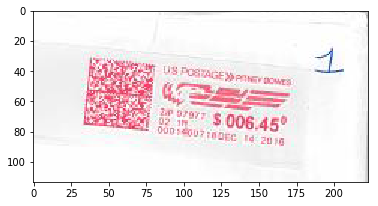

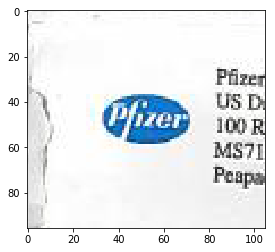

In [20]:
for i in range (0,len(stamp_list)):
    plt.figure()
    plt.imshow(img[stamp_list[i][0]:stamp_list[i][1] ,stamp_list[i][2]:stamp_list[i][3]],cmap='gray')


# save probable stamp parts

In [21]:
for i in range (0,len(stamp_list)):
    #extracted = thresh 
    extracted_img1 = img_c[stamp_list[i][0]:stamp_list[i][1] ,stamp_list[i][2]:stamp_list[i][3]]
    #extracted_img1 = cv2.resize(extracted_img1, (200, 40))
    #ret, extracted_img1 = cv2.threshold(extracted_img1, 200, 255, cv2.THRESH_BINARY)
    #plt.imshow((extracted_img1),cmap= 'gray')
    cv2.imwrite(destination_prob_stamps+str(i)+".png",extracted_img1)

# STAMP Classifier - to classify wheather it's a STAMP or not



In [22]:
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

Using TensorFlow backend.


In [23]:
from sklearn.externals import joblib
clf_stamp = joblib.load('clf_stamp.pkl') 
import os
model = keras.applications.VGG16(weights='imagenet', include_top=True)

In [24]:
# get_image will return a handle to the image itself, and a numpy array of its pixels to input the network
def get_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x


In [25]:
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)

In [26]:
images_path = destination_prob_stamps
max_num_images = 100

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(range(len(images)), max_num_images))]

print("keeping %d images to analyze" % len(images))

keeping 4 images to analyze


In [27]:
features = []
for image_path in (images):
    #print(image_path)
    img, x = get_image(image_path);
    feat = feat_extractor.predict(x)[0]
    features.append(feat)
features = np.array(features)

In [28]:
stamp_class = clf_stamp.predict(features)

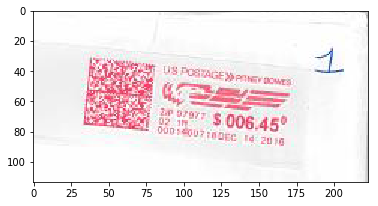

Stamp class     : 1


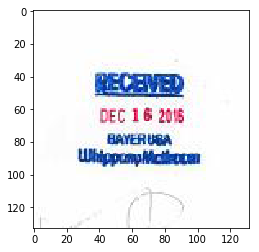

Stamp class     : 1


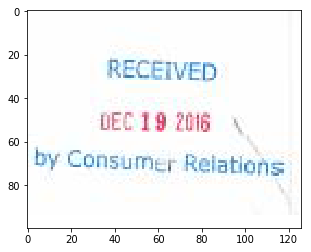

Stamp class     : 1


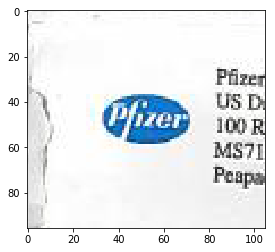

Stamp class     : 1


In [29]:
#fig = figure()
c=0
for image_path in (images):    
    #print(image_path)
    x = cv2.imread(image_path)
    img_c = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    plt.imshow(img_c,cmap='hsv')
    plt.show()
    print("Stamp class     : "+ str(stamp_class[c]))        
    c=c+1

# Extract information using tesseract from probable stamps 

In [30]:
from PIL import Image
import pytesseract
import imutils

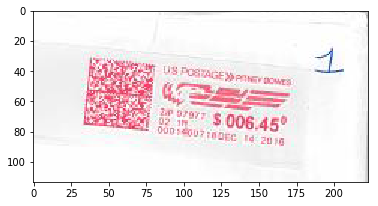

['']


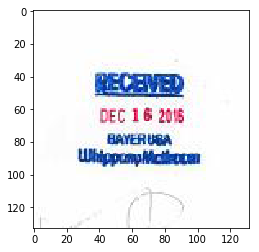

['“CHM']


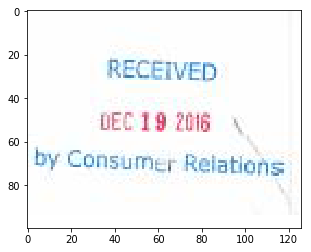

['RECEIVED', '', 'DEC 19 2016 x', 'by Consumu Relations']


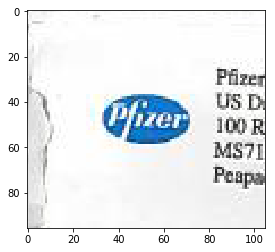

['US D', 'le', 'M871']


In [44]:
basewidth = 300

c=0
for image_path in (images):  
    img = Image.open(image_path)    
    if stamp_class[c]==1:
        plt.imshow(img,cmap='hsv')
        plt.show()
              
        wpercent = (basewidth/float(img.size[0]))
        hsize = int((float(img.size[1])*float(wpercent)))
        img = img.resize((basewidth,hsize), Image.ANTIALIAS)
        
        threshold =  190 #167  #170
        img = img.point(lambda p: p > threshold and 255)
        #im = im.rotate(-6)
        
        text = pytesseract.image_to_string(img)
        print(text.split('\n'))
        
        
    c=c+1